# _Dataquest: The Mean_

This notebook was adapted from Dataquest's lesson _The Mean_ within their probability and statistics chapter. 

# _Notes_

- depending on the particular characteristics of a distribution, we can summarize using:
    - mean
    - weighted mean
    - median
    - mode
- also learn to measure the variability in a distribution, using measures like:
    - variance
    - standard deviation
- once we understand these measures of variability, we can learn how to locate a value in a distribution
    - to determine how it compares to other values
    - can answer with precision using a z-score

## _The Mean_

In [15]:
# generate a list of integers
distribution = [0,2,3,3,3,4,13]

# calculate the mean of the above
mean = sum(distribution) / len(distribution)

# is the value of the mean at the center of the distribution's range?
center = False

In [19]:
# sum the values below the mean
below = sum([abs(val - mean) for val in distribution if val < mean])

# sum the values above the mean
above = sum([abs(val - mean) for val in distribution if val > mean])

In [22]:
# are above and below equal to each other
equal_distances = (below == above)

# print out answer
print(equal_distances)

True


## _The Mean as a Balance Point_

- should avoid thinking of mean necessarily as being center of the distribution's range
    - will be cases where it isn't, and cases where it isn't
    - instead think of it as point where total distance _below_ & _above_ mean is the same
- think of a seesaw, it would be perfectly balanced if the children on either side were the same weight

In [24]:
import numpy as np

equal_distances = 0
# generate 5000 different distributions
for n in range(5000):
    # set seed
    np.random.seed(n)
    # generate random distribution
    distribution = np.random.randint(low=0, high=1000, size=10)
    # calculate mean of the distribution
    mean = np.mean(distribution)
    # measure the distance above/below mean
    below = round(sum([abs(val - mean) for val in distribution if val < mean]), 1)
    above = round(sum([abs(val - mean) for val in distribution if val > mean]), 1)
    # are above and below equal to each other?
    equal = (below == above)
    if equal == True:
        equal_distances += 1
        
print(equal_distances)

5000


## _Defining the Mean Algebraically_

- by convention, mean of a population is denoted with Greek letter _μ_ ("mew)
- to denote sample mean, we use x̄ ("x-bar") and we use lowercase n (as opposed to uppercase)
    - could also be represented by _M_, X̄, or x̄ to the n

In [26]:
# do we use the mew symbol to denote both the population and sample mean?
one = False

# if a population has 8 values, the lowercase n = 8?
two = False

# x-bar is symbol used as an alternative to M, uppercase X-bar, or x-bar to the n?
three = True

## _An Alternative Definition_

- $\sum$ symbol indicates addition of a series of numbers
    - $\sum D$ indicates _sum of the distribution D_
- $\sum_{n=1}^{\infty} x_{i}$ --> customary sum of values
    - think of this in terms of `for` loop
        - iteration variable is _i_, meaning it takes a different value for each iteration
        - previous value is incremented by 1
        - iteration stops when _i_ = N

In [27]:
# coding the logic
distribution = [1, 2, 3]

i = 1
N = 3
sum_of_distribution = 0

for _ in range(N):
    sum_of_distribution += distribution[i - 1] # subtract 1 because Python lists use zero-based indexing
    i += 1

In [30]:
# write a function that gathers the population mean
def population_mean(num_array):
    i = 1
    N = len(num_array)
    dist_sum = 0
    
    for _ in range(N):
        dist_sum += num_array[i - 1]
        i += 1
        
    return dist_sum / N

In [31]:
# three distributions of numbers
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

# gather the means of three distributions above with our defined function
mean_1 = population_mean(distribution_1)
mean_2 = population_mean(distribution_2)
mean_3 = population_mean(distribution_3)

27.25

## _Introducing the Data_

- will be working with data set describing characteristics of houses sold beteen 2006-2010 in Ames, IA
    - 2930 rows in the data set
    - 82 chracteristics described (i.e., means there are 82 columns)
- data set was collected by professor [Dean DeCock](https://www.truman.edu/faculty-staff/decock/)
    - describes data collection process [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627) 
    - the Dataquest version is slightly modified for teaching purposes
- Reminder:
    - Nominal: Categorical data and numbers that are simply used as identifiers or names represent a nominal scale of measurement
    - Ordinal: An ordinal scale of measurement represents an ordered series of relationships or rank order (i.e., runners finished in 1st, 2nd, and 3rd place is ordinal)
    - Interval: A scale which represents quantity and has equal units but for which zero represents simply an additional point of measurement is an interval scale
    - Ratio: The ratio scale of measurement is similar to the interval scale in that it also represents quantity and has equality of units, but this scale does have an absolute zero

In [33]:
import pandas as pd

# read in Ames housing txt file
df = pd.read_csv('data/AmesHousing_1.txt', sep = '\t')

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [39]:
# this data set has variables measured on every scale of measurement?
one = True

# SalePrice column is continuous and measured on an interval scale?
two = False

# original file contained 113 variables and 3970 properties, so our current file is a sample?
three = True

## _Mean House Prices_

- if interested in analyzing distribution of sales prices we could use `describe()` method
- alternatively, if we only wanted the mean we could use the `mean()` method

In [40]:
# custom function to generate mean of a distribution
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

In [42]:
# use above function to compute mean of SalePrice distribution
function_mean = mean(df['SalePrice'])

# use pandas to calculate mean of SalePrice distribution
pandas_mean = df['SalePrice'].mean()

# compare the two variables above to see if they are equal
means_are_equal = (function_mean == pandas_mean)

In [43]:
means_are_equal

True

## _Estimating the Population Mean_

- almost always work with samples
    - yet we want to answer questions about populations
- best we can do is compute the sample mean and hope it's a good estimate for the population mean
    - when estimating population mean with sample mean, three possible scenarios:
        - sample mean overestimates population mean
        - sample mean underestimates population mean
        - sample mean is equal to population mean
    - when overestimation, underestimation happens, sampling error has occurred
        - so sampling error is equal to the difference between the population mean and the sample mean
    - aim is to reduce the sampling error, two important factors that influence it:
        - sample representatvitity --> more representative sample is, closer it'll be to population mean
        - sample size --> larger the sample, more chances we have to get representative sample

In [55]:
# compute mean of the SalePrice variable
parameter = df['SalePrice'].mean()
# initial sample size
sample_size = 5

# lists of sample size and sampling error
sample_size_list = []
sampling_error_list = []
# generate sample of SalePrice distribution to see sampling error
for i in range(101):
    # take sample
    sample = df['SalePrice'].sample(n=sample_size, random_state=i)
    # increase sample size for next iteration
    sample_mean = sample.mean()
    # generate sampling error
    sampling_error = parameter - sample_mean
    # append above value to list of sampling errors
    sampling_error_list.append(sampling_error)
    # append value of sample size
    sample_size_list.append(sample_size)
    # increment sample size by 29
    sample_size += 29

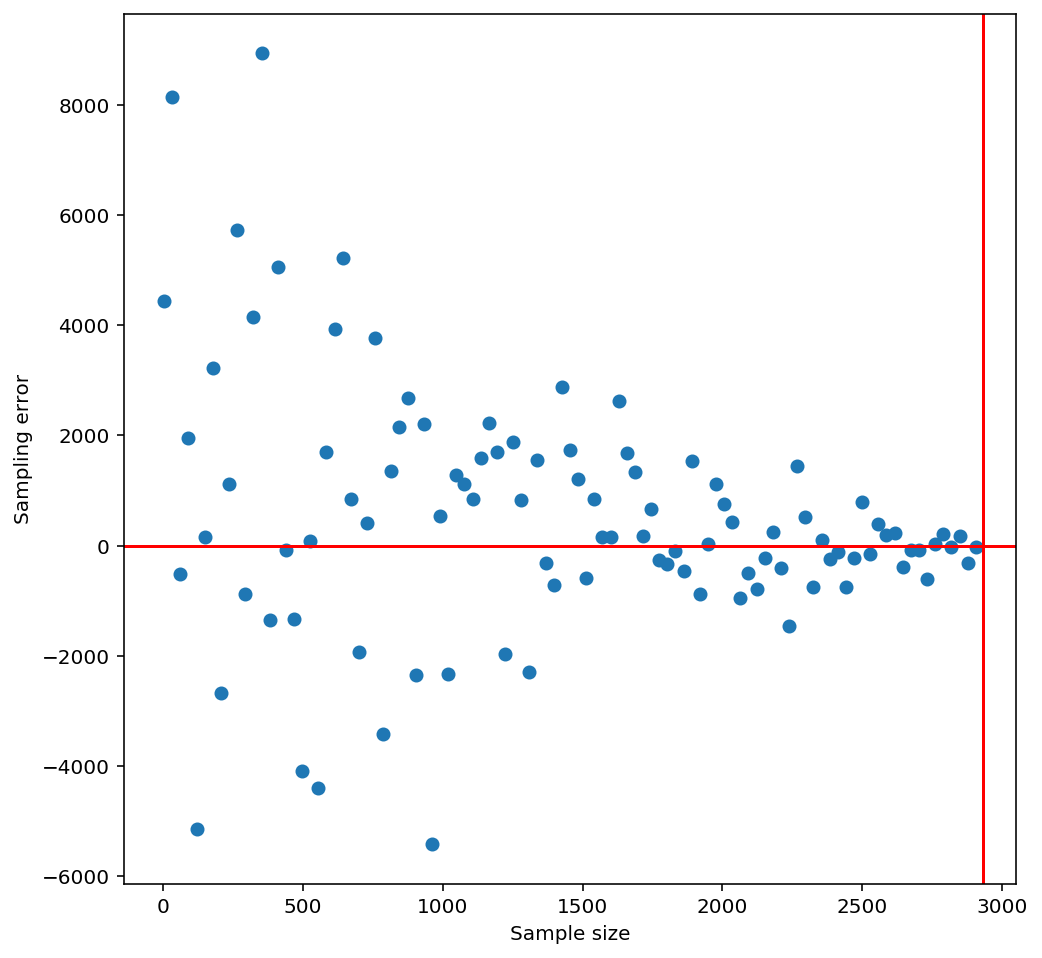

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.figure(figsize=(8,8))
plt.scatter(x=sample_size_list, y=sampling_error_list)
plt.axhline(0, color='red') # indicates where sampling error is 0
plt.axvline(2930, color='red') # illustrates population size
plt.xlabel('Sample size')
plt.ylabel('Sampling error');

## _Estimates from Low-Sized Samples_

- general tendency for sampling error to decrease as sample size increases
    - does have exceptions though
    - however, most small samples will give a good estimate of the population mean (see example below)

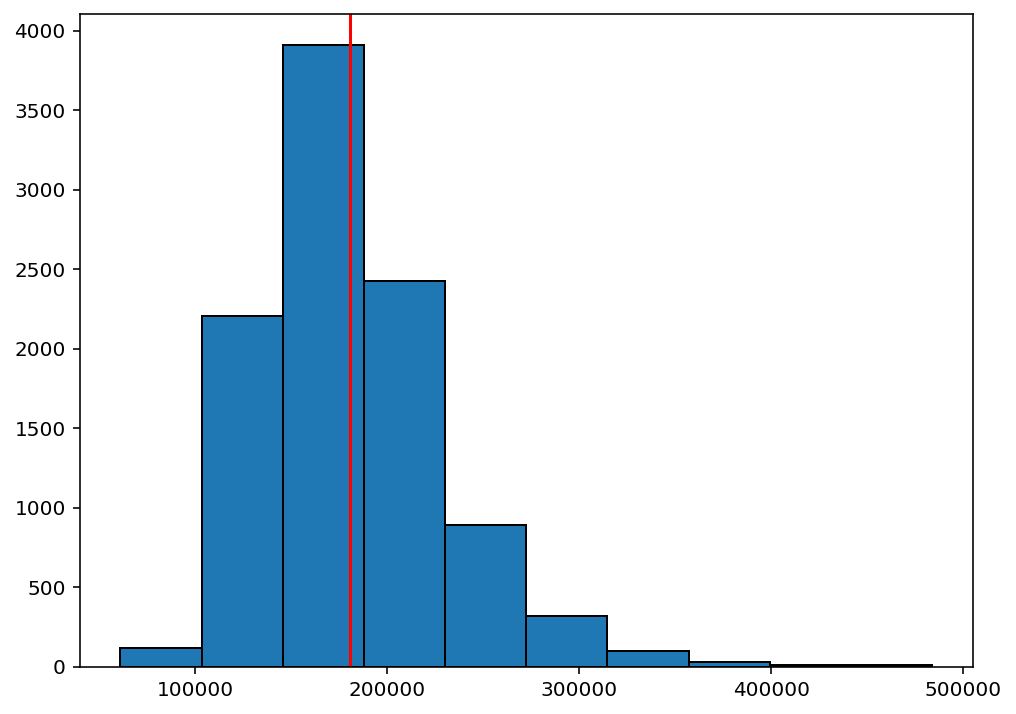

In [68]:
means = []

for i in range(10000):
    sample = df['SalePrice'].sample(n=3, random_state=i)
    means.append(sample.mean())

plt.figure(figsize=(8,6))
plt.hist(means, edgecolor='black')
plt.axvline(df['SalePrice'].mean(), color='red');

- can see most sample means cluster around population mean (i.e., the red line)

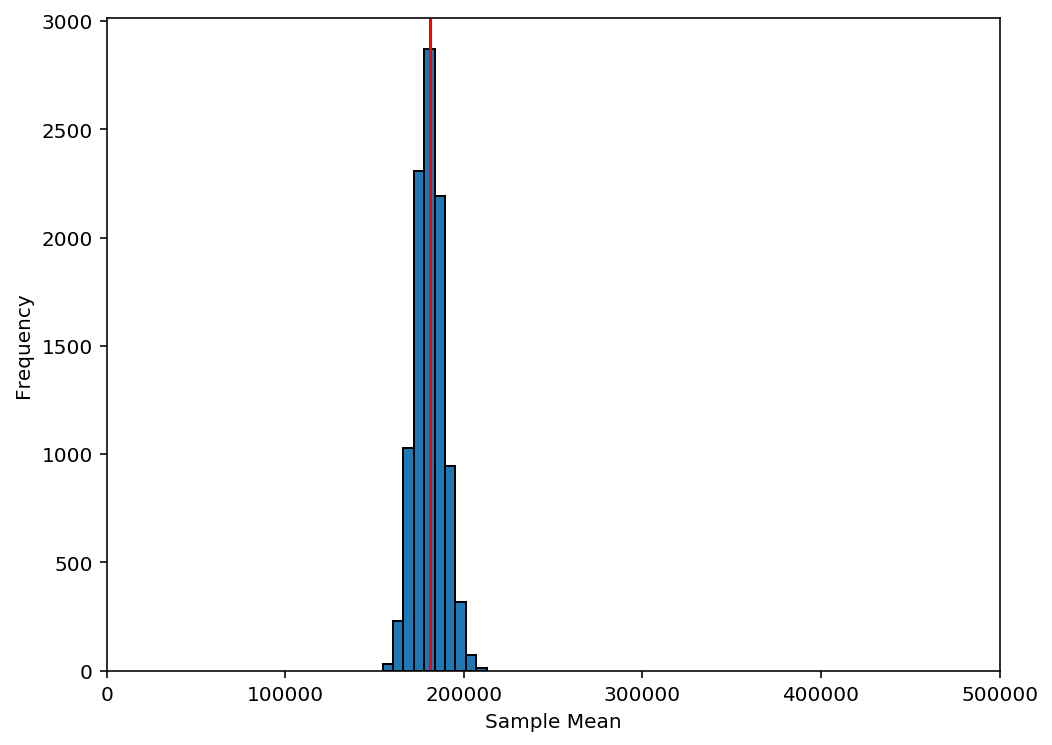

In [73]:
# take 10000 samples of sample size = 100
means = []

for i in range(10000):
    sample = df['SalePrice'].sample(n=100, random_state=i)
    means.append(sample.mean())

# generate histogram to visualize distribution of sample means
plt.figure(figsize=(8,6))
plt.hist(means, edgecolor='black')
plt.axvline(df['SalePrice'].mean(), color='red')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
# set x-axis as same range as the one above
plt.xlim(right=500000)
plt.xlim(left=0);

- In general, as we increase sample size, there will be less variability around population mean
    - less variability = less chances to get poor estimate for population mean

## _The Sample Mean as an Unbiased Estimator_

- if we took all possible samples for a given sample size, we'd observe that the mean of the sample means would equal the population mean
    - when a statistic is on average equal to the parameter it estimates, we call the statistic an *unbiased estimator*
- this also holds true if we sample with replacement
    - sample one value and then put it back in population

In [98]:
from itertools import permutations

population = [3, 7, 2]

# generate list of all possible combinations of population above
combinations = list(permutations(population, 2))

# list of the sample means
sample_means = [np.mean(combo) for combo in combinations]

# generate population mean 
population_mean = np.mean(population)

# generate the mean of the sample means
mean_of_sample_means = np.mean(sample_means)

# is the mean of the sample means equal to the population mean?
unbiased = bool(population_mean == mean_of_sample_means)

print(unbiased)

True
